In [1]:
import pandas as pd
from dfply import *
import datetime as dt
from glob import glob
import re
from toolz import first
from more_dfply import recode
from functoolz import pipeable

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from project_raw_pd_parcel_types import common_parcel_types

In [27]:
lake_data = pd.read_csv("./data/union_of_parcel_data.csv")
lake_stats = pd.read_csv("./data/lakes_stats.csv")

/home/ox6036qb/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,4,5,7,8,12,13,16,17,18,19,25,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
lake_stats.columns = ['Unnamed: 0', 'lake_code', 'Year', 'lake_name', 'mean_secchi',
       'med_secchi', 'sd_secchi', 'mean_phos', 'med_phos', 'sd_phos']

#lake_stats.head()

#lake_data.columns

lake_all = lake_data >> left_join(lake_stats, by=['Year', 'lake_code', 'lake_name'])

#lake_all.shape

#lake_all.head()

lake_all.to_csv("./data/parcel_with_lake_data.csv")

In [4]:
lake_all = pd.read_csv("./data/parcel_with_lake_data.csv")

/home/ox6036qb/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5,6,8,9,13,14,17,18,19,20,26,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
lake_all.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'ACRES_DEED', 'ACRES_POLY', 'AGPRE_ENRD',
       'AG_PRESERV', 'BASEMENT', 'CITY', 'COOLING', 'DWELL_TYPE', 'EMV_BLDG',
       'EMV_LAND', 'FIN_SQ_FT', 'GARAGE', 'GARAGESQFT', 'GREEN_ACRE',
       'HOMESTEAD', 'LANDMARK', 'OWN_ADD_L1', 'OWN_ADD_L2', 'OWN_ADD_L3',
       'PARC_CODE', 'PIN', 'SALE_VALUE', 'SPEC_ASSES', 'TAX_CAPAC',
       'TAX_EXEMPT', 'TOTAL_TAX', 'USE1_DESC', 'USE2_DESC', 'USE3_DESC',
       'USE4_DESC', 'WSHD_DIST', 'XUSE1_DESC', 'XUSE2_DESC', 'XUSE3_DESC',
       'XUSE4_DESC', 'YEAR_BUILT', 'Year', 'centroid_lat', 'centroid_long',
       'lat_long', 'lake_code', 'distance_to_lake', 'lake_name',
       'Unnamed: 0_y', 'mean_secchi', 'med_secchi', 'sd_secchi', 'mean_phos',
       'med_phos', 'sd_phos'],
      dtype='object')

In [29]:
secchi_by_lake = (lake_stats
                  >> group_by(X.lake_name)
                  >> summarize(overall_mean_secchi = X.mean_secchi.mean())
                 ) 

In [62]:
low_secchi = [name for name in secchi_by_lake.sort_values('overall_mean_secchi')[0:5].lake_name]

high_secchi = [name for name in secchi_by_lake.sort_values('overall_mean_secchi')[-5:].lake_name]

In [31]:
high_secchi

['Lower Prior Lake',
 'Sunset Lake',
 'East Boot Lake',
 'Lac Lavon Lake',
 'Jane Lake']

In [32]:
lake_names = set(lake_stats.lake_name)

Text(0,0.5,'Mean Secchi Depth')

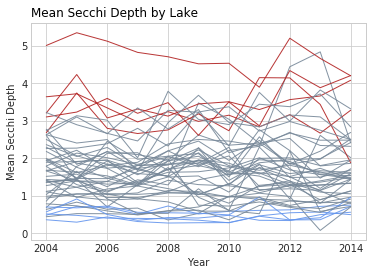

In [33]:
plt.style.use('seaborn-whitegrid')

palette = plt.get_cmap('Set1')

for name in lake_names:
    df = (lake_stats >> filter_by(X.lake_name == name))
    if name in high_secchi:
        plt.plot(df.Year, df.mean_secchi, marker='', color='firebrick', linewidth=1, alpha=0.9, label="High Mean Secchi Depth")
    elif name in low_secchi:
        plt.plot(df.Year, df.mean_secchi, marker='', color='cornflowerblue', linewidth=1, alpha=0.9, label="Low Mean Secchi Depth")
    else:
        plt.plot(df.Year, df.mean_secchi, marker='', color='lightslategrey', linewidth=1, alpha=0.9, label="Mean Secchi Depth")
               

    
plt.title("Mean Secchi Depth by Lake", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Year")
plt.ylabel("Mean Secchi Depth")


In [10]:
plt.style.available

['Solarize_Light2',
 '_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'tableau-colorblind10']

In [34]:
phos_by_lake = (lake_stats
                  >> group_by(X.lake_name)
                  >> summarize(overall_mean_phos = X.mean_phos.mean())
                 ) 

In [35]:
low_phos = [name for name in phos_by_lake.sort_values('overall_mean_phos')[0:5].lake_name]

high_phos = [name for name in phos_by_lake.sort_values('overall_mean_phos')[-5:].lake_name]

In [36]:
high_phos

['Colby Lake',
 'Northwood Lake',
 'Eagle Lake',
 'George Watch Lake',
 'Swede Lake']

Text(0,0.5,'Mean Phosphorus')

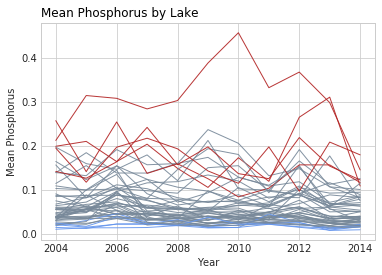

In [37]:
plt.style.use('seaborn-whitegrid')

#palette = plt.get_cmap('Set1')

for name in lake_names:
    df = (lake_stats >> filter_by(X.lake_name == name))
    if name in high_phos:
        plt.plot(df.Year, df.mean_phos, marker='', color='firebrick', linewidth=1, alpha=0.9, label="High Mean phosphorus")
    elif name in low_phos:
        plt.plot(df.Year, df.mean_phos, marker='', color='cornflowerblue', linewidth=1, alpha=0.9, label="Low Mean phosphorus")
    else:
        plt.plot(df.Year, df.mean_phos, marker='', color='lightslategrey', linewidth=1, alpha=0.9, label="Mean phosphorus")
               

    
plt.title("Mean Phosphorus by Lake", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Year")
plt.ylabel("Mean Phosphorus")


In [80]:
lake_stats.Year = lake_stats.Year.astype(str)
lakes_first_last_year = (lake_stats
                         >> filter_by((X.Year.isin(['2004','2014'])))
                        )
lakes_diff = (lake_stats
                         >> filter_by((X.Year.isin(['2004','2014'])))
                         >> spread(X.Year, X.mean_secchi)
                         #>> rename(secchi_2004 = 2004)#, secchi_2014 = 2014)
                         >> group_by(X.lake_name)
                         >> summarize(secchi_2004 = X['2004'].sum(), secchi_2014 = X['2014'].sum())
                         >> mutate(diff = X.secchi_2014 - X.secchi_2004)
                        )

In [83]:
lakes_first_last_year.head()

,Unnamed: 0,lake_code,Year,lake_name,mean_secchi,med_secchi,sd_secchi,mean_phos,med_phos,sd_phos
0,0,19002100-01,2004,Alimagnet Lake,0.445000,0.500,0.204736,0.164500,0.1070,0.137039
10,10,19002100-01,2014,Alimagnet Lake,0.966667,1.150,0.445856,0.082500,0.0560,0.046308
11,11,82011602-01,2004,Armstrong Lake,0.990357,0.914,0.115908,0.059286,0.0575,0.019535
21,21,82011602-01,2014,Armstrong Lake,0.704000,0.610,0.424123,0.065600,0.0760,0.039234
22,22,82012300-01,2004,Bass Lake,2.612571,2.591,0.572962,0.030429,0.0300,0.005192


In [84]:
lakes_diff.head()

,lake_name,secchi_2004,secchi_2014,diff
0,Alimagnet Lake,0.445000,0.966667,0.521667
1,Armstrong Lake,0.990357,0.704000,-0.286357
2,Bass Lake,2.612571,2.320000,-0.292571
3,Bavaria Lake,1.986250,1.723077,-0.263173
4,Big Comfort Lake,1.894000,1.456364,-0.437636


In [77]:
lakes_first_last_year.dtypes

lake_name       object
secchi_2004    float64
secchi_2014    float64
diff           float64
dtype: object

Text(0,0.5,'Mean Secchi Depth')

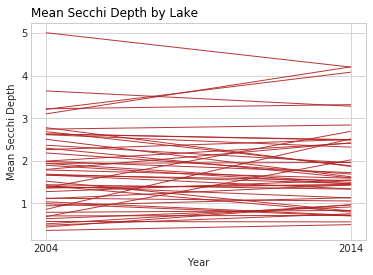

In [82]:
plt.style.use('seaborn-whitegrid')

palette = plt.get_cmap('Set1')

for name in lake_names:
    df = (lakes_first_last_year >> filter_by(X.lake_name == name))
    #if name in high_secchi:
    plt.plot(df.Year, df.mean_secchi, marker='', color='firebrick', linewidth=1, alpha=0.9, label="High Mean Secchi Depth")
    #elif name in low_secchi:
    #    plt.plot(df.Year, df.mean_secchi, marker='', color='cornflowerblue', linewidth=1, alpha=0.9, label="Low Mean Secchi Depth")
    #else:
    #    plt.plot(df.Year, df.mean_secchi, marker='', color='lightslategrey', linewidth=1, alpha=0.9, label="Mean Secchi Depth")
               

    
plt.title("Mean Secchi Depth by Lake", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Year")
plt.ylabel("Mean Secchi Depth")